In [43]:
pip install lightgbm

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.4 MB 812.7 kB/s eta 0:00:02
   ---- ----------------------------------- 0.2/1.4 MB 1.5 MB/s eta 0:00:01
   ------ --------------------------------- 0.2/1.4 MB 1.9 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.4 MB 2.1 MB/s eta 0:00:01
   ------------------- -------------------- 0.7/1.4 MB 3.0 MB/s eta 0:00:01
   ---------------------- ----------------- 0.8/1.4 MB 2.8 MB/s eta 0:00:01
   ------------------------------ --------- 1.1/1.4 MB 3.3 MB/s eta 0:00:01
   ------------------------------ --------- 1.1/1.4 MB 3.2 MB/s eta 0:00:01
   ------------------------------ --------- 1.1/1.4 MB 3.2 MB/s eta 0:00:01
   ------------------------------ --------- 1.1/1.4 MB 3.2 MB/s eta 0:00:01
   ------------------------------ --------- 1.1/1.4 MB 3.2 MB/s eta 0:00:01
   ---------------------

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor

In [3]:
# loading the dataset to a pandas Dataframe
CF_dataset = pd.read_csv('carbon-emission-data.csv')

In [5]:
# printing the first five rows of the dataset
CF_dataset.head()

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public,NaN,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,NaN,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743


In [7]:
#number of rows and columns
CF_dataset.shape

(10000, 20)

In [23]:
CF_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Body Type                      10000 non-null  object
 1   Sex                            10000 non-null  object
 2   Diet                           10000 non-null  object
 3   How Often Shower               10000 non-null  object
 4   Heating Energy Source          10000 non-null  object
 5   Transport                      10000 non-null  object
 6   Vehicle Type                   3279 non-null   object
 7   Social Activity                10000 non-null  object
 8   Monthly Grocery Bill           10000 non-null  int64 
 9   Frequency of Traveling by Air  10000 non-null  object
 10  Vehicle Monthly Distance Km    10000 non-null  int64 
 11  Waste Bag Size                 10000 non-null  object
 12  Waste Bag Weekly Count         10000 non-null  int64 
 13  Ho

In [9]:
#checking for missing values
CF_dataset.isnull().sum()

Body Type                           0
Sex                                 0
Diet                                0
How Often Shower                    0
Heating Energy Source               0
Transport                           0
Vehicle Type                     6721
Social Activity                     0
Monthly Grocery Bill                0
Frequency of Traveling by Air       0
Vehicle Monthly Distance Km         0
Waste Bag Size                      0
Waste Bag Weekly Count              0
How Long TV PC Daily Hour           0
How Many New Clothes Monthly        0
How Long Internet Daily Hour        0
Energy efficiency                   0
Recycling                           0
Cooking_With                        0
CarbonEmission                      0
dtype: int64

In [11]:
# Check for missing values in the test set
missing_values_test = CF_dataset.isnull().sum()

# Display the counts of missing values for each column
print("\nMissing values in the test set:")
print(missing_values_test[missing_values_test > 0])


Missing values in the test set:
Vehicle Type    6721
dtype: int64


In [37]:
CF_dataset.isnull().sum()

Body Type                        0
Sex                              0
Diet                             0
How Often Shower                 0
Heating Energy Source            0
Transport                        0
Vehicle Type                     0
Social Activity                  0
Monthly Grocery Bill             0
Frequency of Traveling by Air    0
Vehicle Monthly Distance Km      0
Waste Bag Size                   0
Waste Bag Weekly Count           0
How Long TV PC Daily Hour        0
How Many New Clothes Monthly     0
How Long Internet Daily Hour     0
Energy efficiency                0
Recycling                        0
Cooking_With                     0
CarbonEmission                   0
dtype: int64

In [13]:
# Display available columns in the dataset
print("Available columns:")
print(CF_dataset.columns)

Available columns:
Index(['Body Type', 'Sex', 'Diet', 'How Often Shower', 'Heating Energy Source',
       'Transport', 'Vehicle Type', 'Social Activity', 'Monthly Grocery Bill',
       'Frequency of Traveling by Air', 'Vehicle Monthly Distance Km',
       'Waste Bag Size', 'Waste Bag Weekly Count', 'How Long TV PC Daily Hour',
       'How Many New Clothes Monthly', 'How Long Internet Daily Hour',
       'Energy efficiency', 'Recycling', 'Cooking_With', 'CarbonEmission'],
      dtype='object')


In [15]:
# Filling missing values in the 'Vehicle Type' column with the most frequent value (mode)
CF_dataset['Vehicle Type'].fillna(CF_dataset['Vehicle Type'].mode()[0], inplace=True)

C:\Users\abhin\AppData\Local\Temp\ipykernel_23932\1926823212.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  CF_dataset['Vehicle Type'].fillna(CF_dataset['Vehicle Type'].mode()[0], inplace=True)


In [17]:
# check target variable
CF_dataset['CarbonEmission'].value_counts()

CarbonEmission
1674    13
1616    12
1765    11
1484    11
1875    11
        ..
4203     1
5033     1
4757     1
3327     1
3283     1
Name: count, Length: 3509, dtype: int64

In [19]:
#statistical measures about the data
CF_dataset.describe()

,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,CarbonEmission
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,173.875200,2031.485900,4.024600,12.139200,25.109000,11.889100,2269.147300
std,72.234018,2769.715597,1.990375,7.106369,14.698725,7.277218,1017.675247
min,50.000000,0.000000,1.000000,0.000000,0.000000,0.000000,306.000000
25%,111.000000,69.000000,2.000000,6.000000,13.000000,6.000000,1538.000000
50%,173.000000,823.000000,4.000000,12.000000,25.000000,12.000000,2080.000000
75%,237.000000,2516.750000,6.000000,18.000000,38.000000,18.000000,2768.000000
max,299.000000,9999.000000,7.000000,24.000000,50.000000,24.000000,8377.000000


The code prepares the dataset by separating features from the target variable, identifying and encoding categorical features, and splitting the dataset into training and testing sets for model training and evaluation.
These steps are crucial for ensuring that the machine learning model can learn effectively from the data and generalize well to unseen dataps.

In [21]:
# Display feature importances
feature_importance = random_forest.feature_importances_
print("Feature Importance:")
for feature, importance in zip(X_encoded.columns, feature_importance):  # Use X_encoded for feature names
    print(f"{feature}: {importance:.4f}")

NameError: name 'random_forest' is not defined

In [25]:
#Normalization(MinMaxScaler) for numerical and One-hot Encoding(for non numerical data) 

df = pd.DataFrame(CF_dataset)

# Flatten the Recycling column
recycling_df = pd.get_dummies(df['Recycling'].apply(lambda x: ','.join(x)), prefix='Recycling')
cooking_df = pd.get_dummies(df['Cooking_With'].apply(lambda x: ','.join(x)), prefix='Cooking_With')

# Drop original Recycling and Cooking_With columns
df.drop(['Recycling', 'Cooking_With'], axis=1, inplace=True)

# Concatenate the new one-hot encoded columns with the original DataFrame
df = pd.concat([df, recycling_df, cooking_df], axis=1)

# One-Hot Encoding for categorical variables
categorical_cols = ['Body Type', 'Sex', 'Diet', 'How Often Shower', 
                    'Heating Energy Source', 'Transport', 'Vehicle Type', 
                    'Social Activity', 'Frequency of Traveling by Air', 
                    'Waste Bag Size', 'Energy efficiency']

# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Min-Max Scaling for numerical columns
numerical_cols = ['Monthly Grocery Bill', 'Vehicle Monthly Distance Km', 
                  'Waste Bag Weekly Count', 'How Long TV PC Daily Hour', 
                  'How Many New Clothes Monthly', 'How Long Internet Daily Hour', 
                  'CarbonEmission']

scaler = MinMaxScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Show the transformed DataFrame
df_encoded.head()

,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,CarbonEmission,"Recycling_[,',G,l,a,s,s,',,, ,',M,e,t,a,l,',]","Recycling_[,',G,l,a,s,s,',]","Recycling_[,',M,e,t,a,l,',]",...,Frequency of Traveling by Air_never,Frequency of Traveling by Air_rarely,Frequency of Traveling by Air_very frequently,Waste Bag Size_extra large,Waste Bag Size_large,Waste Bag Size_medium,Waste Bag Size_small,Energy efficiency_No,Energy efficiency_Sometimes,Energy efficiency_Yes
0,0.722892,0.021002,0.500000,0.291667,0.52,0.041667,0.239376,False,False,True,...,False,False,False,False,True,False,False,True,False,False
1,0.257028,0.000900,0.333333,0.375000,0.76,0.208333,0.196506,False,False,True,...,False,True,False,True,False,False,False,True,False,False
2,0.353414,0.247225,0.000000,0.583333,0.94,0.250000,0.283608,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,0.429719,0.007401,0.333333,0.833333,0.10,0.291667,0.095155,False,False,False,...,False,True,False,False,False,True,False,False,True,False
4,0.867470,0.845785,0.000000,0.125000,0.10,0.250000,0.549746,False,False,False,...,False,False,True,False,True,False,False,False,False,True


In [29]:
# Assuming df_encoded is already defined and preprocessed
# Split the data into features and target
X = df_encoded.drop('CarbonEmission', axis=1)  # Features
y = df_encoded['CarbonEmission']                # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Convert R-squared to percentage
r2_percentage = r2 * 100

# Print the results
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Accuracy: {r2_percentage:.2f}%")

Mean Squared Error: 0.0007
R-squared Accuracy: 95.51%


In [31]:
print(X.shape, X_train.shape,X_test.shape)

(10000, 78) (8000, 78) (2000, 78)


In [33]:
# Define a threshold for correctness
threshold = 0.5 # Adjust as needed

# Convert regression problem into a binary classification problem based on the threshold
binary_y_pred = (y_pred > threshold).astype(int)
binary_y_test = (y_test > threshold).astype(int)

# Calculate accuracy as a binary classification metric
accuracy = (binary_y_pred == binary_y_test).mean()
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 98.35%


In [35]:
# Make Predictions
y_pred = model.predict(X_test)

# Create a DataFrame for predictions
predictions = pd.DataFrame({'Predicted Carbon Emission': y_pred})

# Set Thresholds for Carbon Emission Levels
threshold_low = 2000   # You can adjust these thresholds based on your dataset's distribution
threshold_high = 4000  # You can adjust these thresholds based on your dataset's distribution

# Categorize Carbon Emission Levels
predictions['Emission Level'] = pd.cut(predictions['Predicted Carbon Emission'], 
                                        bins=[-float('inf'), threshold_low, threshold_high, float('inf')],
                                        labels=['Low Emission', 'Medium Emission', 'High Emission'])

# Display the categorized emission levels
print(predictions[['Predicted Carbon Emission', 'Emission Level']])

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

      Predicted Carbon Emission Emission Level
0                      0.104645   Low Emission
1                      0.173481   Low Emission
2                      0.229541   Low Emission
3                      0.337099   Low Emission
4                      0.273821   Low Emission
...                         ...            ...
1995                   0.229273   Low Emission
1996                   0.148474   Low Emission
1997                   0.420242   Low Emission
1998                   0.282091   Low Emission
1999                   0.205088   Low Emission

[2000 rows x 2 columns]
Mean Squared Error: 0.0007


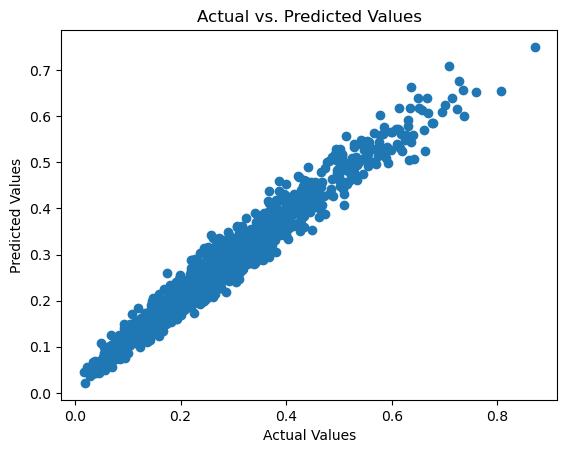

In [37]:
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are your true and predicted values, respectively
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()


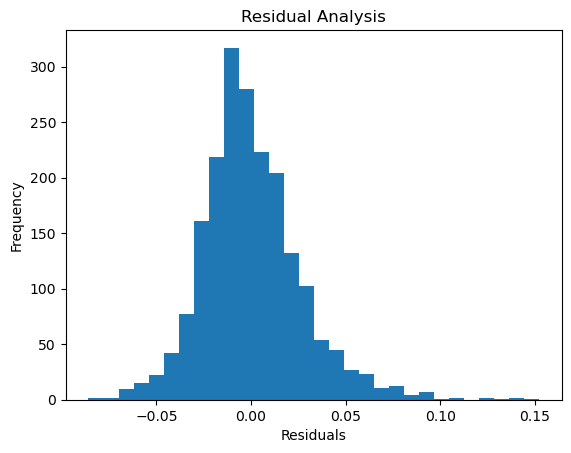

In [39]:
residuals = y_test - y_pred
plt.hist(residuals, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Analysis")
plt.show()

In [41]:
r_squared = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R-squared: {r_squared:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")


R-squared: 0.96
Mean Absolute Error: 0.02


In [43]:


# Define your model
gbr = GradientBoostingRegressor()

# Train the model (assuming X_train and y_train are already defined)
gbr.fit(X_train, y_train)

# Get feature importances
feature_importance = gbr.feature_importances_
feature_importance_df = pd.DataFrame({"Feature": X_train.columns, "Importance": feature_importance})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Display feature importances
print("Feature Importance:")
print(feature_importance_df)


Feature Importance:
                                              Feature  Importance
1                         Vehicle Monthly Distance Km    0.376535
70      Frequency of Traveling by Air_very frequently    0.186039
60                              Vehicle Type_electric    0.120961
4                        How Many New Clothes Monthly    0.040412
67           Frequency of Traveling by Air_frequently    0.038003
..                                                ...         ...
16                        Recycling_[,',P,a,p,e,r,',]    0.000000
15  Recycling_[,',P,a,p,e,r,',,, ,',P,l,a,s,t,i,c,',]    0.000000
47                                    Diet_vegetarian    0.000000
50                   How Often Shower_more frequently    0.000000
48                             How Often Shower_daily    0.000000

[78 rows x 2 columns]


In [47]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler

# Assume df_encoded is your prepared, normalized dataset and gbr_model is already trained
X = df_encoded.drop('CarbonEmission', axis=1)
y = df_encoded['CarbonEmission']

gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X, y)

# Define columns for user input
numerical_columns = [
    'Monthly Grocery Bill', 'Vehicle Monthly Distance Km', 'Waste Bag Weekly Count', 
    'How Long TV PC Daily Hour', 'How Many New Clothes Monthly', 'How Long Internet Daily Hour'
]

categorical_options = {
    'Body Type': ['overweight', 'obese'],
    'Sex': ['male', 'female'],
    'Diet': ['omnivore', 'vegetarian', 'pescatarian'],
    'How Often Shower': ['daily', 'less frequently', 'more frequently', 'twice a day'],
    'Heating Energy Source': ['coal', 'natural gas', 'wood'],
    'Transport': ['public', 'walk/bicycle', 'private'],
    'Vehicle Type': ['petrol', 'diesel'],
    'Social Activity': ['often', 'sometimes', 'never'],
    'Frequency of Traveling by Air': ['never', 'rarely', 'frequently', 'very frequently'],
    'Waste Bag Size': ['small', 'medium', 'large', 'extra large'],
    'Energy efficiency': ['Yes', 'No', 'Sometimes']
}

user_inputs = {}

# Collect categorical inputs
for column, options in categorical_options.items():
    while True:
        user_input = input(f"{column}? ({', '.join(options)}): ").strip().lower()
        if user_input in [opt.lower() for opt in options]:
            for option in options:
                user_inputs[f"{column}_{option}"] = [user_input == option.lower()]
            break
        print("Invalid input. Please choose from the given options.")

# Collect numerical inputs
for column in numerical_columns:
    while True:
        try:
            user_inputs[column] = [float(input(f"Enter a value for {column}: "))]
            break
        except ValueError:
            print("Please enter a valid numerical value.")

# Convert user inputs to DataFrame
user_df = pd.DataFrame(user_inputs)

# Normalize only numerical columns
scaler = MinMaxScaler()
user_df[numerical_columns] = scaler.fit_transform(user_df[numerical_columns])

# Ensure user_df columns match the training set structure
user_df = user_df.reindex(columns=X.columns, fill_value=0)

# Make prediction
user_prediction = gbr_model.predict(user_df)[0]

# Convert the prediction back to the original scale (thousands)
predicted_emission_original_scale = user_prediction * 10000

# Display the prediction with units
print(f"\nPredicted Carbon Emission: {predicted_emission_original_scale:.2f} kg/month")
if predicted_emission_original_scale < 1500:
    print("Prediction: Low Carbon Emission")
elif 1500 <= predicted_emission_original_scale < 3000:
    print("Prediction: Medium Carbon Emission")
else:
    print("Prediction: High Carbon Emission")


Body Type? (overweight, obese):  obese
Sex? (male, female):  male
Diet? (omnivore, vegetarian, pescatarian):  vegetarian
How Often Shower? (daily, less frequently, more frequently, twice a day):  daily
Heating Energy Source? (coal, natural gas, wood):  coal
Transport? (public, walk/bicycle, private):  public
Vehicle Type? (petrol, diesel):  petrol
Social Activity? (often, sometimes, never):  often
Frequency of Traveling by Air? (never, rarely, frequently, very frequently):  rarely
Waste Bag Size? (small, medium, large, extra large):  small
Energy efficiency? (Yes, No, Sometimes):  no
Enter a value for Monthly Grocery Bill:  400
Enter a value for Vehicle Monthly Distance Km:  700
Enter a value for Waste Bag Weekly Count:  6
Enter a value for How Long TV PC Daily Hour:  3
Enter a value for How Many New Clothes Monthly:  7
Enter a value for How Long Internet Daily Hour:  7



Predicted Carbon Emission: 1968.62 kg/month
Prediction: Medium Carbon Emission


In [49]:
import joblib

# Save the trained model
joblib.dump(gbr_model, "gbr_model.pkl")

# Save the MinMaxScaler
joblib.dump(scaler, "scaler.pkl")

# Save the feature column names (to ensure correct encoding in deployment)
joblib.dump(X.columns.tolist(), "columns.pkl")


['columns.pkl']